Impor Library

In [1]:
import ffmpeg
import os
import matplotlib.pyplot as plt
import numpy as np 
import shutil

Konfigurasi Awal dan Pembuatan Direktori

In [2]:
# --- Konfigurasi Nama Folder ---
folder_video_asli = "video_asli"
folder_video_kompresi = "video_kompresi"

# --- Buat direktori jika belum ada ---
if not os.path.exists(folder_video_asli):
    os.makedirs(folder_video_asli)
    print(f"Folder '{folder_video_asli}' berhasil dibuat.")
if not os.path.exists(folder_video_kompresi):
    os.makedirs(folder_video_kompresi)
    print(f"Folder '{folder_video_kompresi}' berhasil dibuat.")

# List untuk menyimpan statistik kompresi
statistik_kompresi = []

Fungsi Kompresi H.264 

In [3]:
def kompres_video_h264(input_path, output_path, crf=23, preset='medium'):
    """
    Fungsi untuk mengkompres video menggunakan FFmpeg dengan codec H.264 (libx264).
    Format kontainer output akan sama dengan input_path kecuali untuk kasus khusus (misal GIF).
    Mengembalikan statistik kompresi.

    Args:
        input_path (str): Path ke file video asli.
        output_path (str): Path untuk menyimpan file video hasil kompresi.
        crf (int): Constant Rate Factor.
        preset (str): Preset kecepatan kompresi.

    Returns:
        dict: Berisi statistik kompresi atau None jika terjadi error.
    """
    try:
        print(f"Memulai kompresi H.264 untuk: {input_path} -> {output_path}")
        stream = ffmpeg.input(input_path)
        
        stream = ffmpeg.output(stream, output_path, vcodec='libx264', crf=crf, preset=preset, acodec='aac', strict='experimental')
        ffmpeg.run(stream, overwrite_output=True, quiet=True)

        ukuran_asli_bytes = os.path.getsize(input_path)
        ukuran_kompresi_bytes = os.path.getsize(output_path)

        ukuran_asli_mb = ukuran_asli_bytes / (1024 * 1024)
        ukuran_kompresi_mb = ukuran_kompresi_bytes / (1024 * 1024)
        
        rasio_kompresi_persen = 0
        if ukuran_asli_mb > 0:
            rasio_kompresi_persen = (1 - (ukuran_kompresi_mb / ukuran_asli_mb)) * 100
        
        nama_file_asli = os.path.basename(input_path)
        nama_file_output = os.path.basename(output_path)
        kontainer_output = os.path.splitext(nama_file_output)[1]

        print(f"Kompresi Selesai: {output_path}")
        print(f"  Codec Video    : H.264 (libx264)")
        print(f"  Kontainer      : {kontainer_output.upper()}")
        print(f"  CRF            : {crf}")
        print(f"  Preset         : {preset}")
        print(f"  Ukuran Asli    : {ukuran_asli_mb:.2f} MB")
        print(f"  Ukuran Kompresi: {ukuran_kompresi_mb:.2f} MB")
        print(f"  Rasio Kompresi : {rasio_kompresi_persen:.2f}%")
        print("-" * 30)
        
        return {
            "nama_file_asli": nama_file_asli,
            "nama_file_kompresi": nama_file_output,
            "ukuran_asli_mb": ukuran_asli_mb,
            "ukuran_kompresi_mb": ukuran_kompresi_mb,
            "rasio_kompresi_persen": rasio_kompresi_persen,
            "crf": crf,
            "preset": preset,
            "kontainer_output": kontainer_output
        }

    except ffmpeg.Error as e:
        print(f"Error saat kompresi {input_path} ke {output_path}:")
        error_message = "Tidak ada output stderr."
        if e.stderr:
            error_message = e.stderr.decode('utf8', errors='ignore')
        print(f"  Pesan FFmpeg: {error_message}")
        print("-" * 30)
        return None
    except Exception as ex:
        print(f"Terjadi kesalahan umum pada {input_path}: {ex}")
        print("-" * 30)
        return None

Persiapan File Video

In [4]:
daftar_video_input = [
    {"nama": "sample_960x540.mp4", "crf": 23, "preset": "medium"},
    {"nama": "sample_960x540.mov", "crf": 25, "preset": "fast"},
    {"nama": "sample_960x540.mkv", "crf": 22, "preset": "medium"},
    {"nama": "sample_960x540.avi", "crf": 24, "preset": "slow"},
    {"nama": "sample_960x540.webm", "crf": 26, "preset": "ultrafast"},
]

print("Mempersiapkan daftar video untuk dikompresi...")
print(f"Pastikan semua video berikut ada di folder: '{os.path.abspath(folder_video_asli)}'")
for item in daftar_video_input:
    print(f"  - {item['nama']}")
print("Jika file tidak ditemukan, akan dilewati.")

Mempersiapkan daftar video untuk dikompresi...
Pastikan semua video berikut ada di folder: '/home/arch/Documents/Informatika/Semester 6/Sistem Multimedia/Pertemuan 12/Tugas/video_asli'
  - sample_960x540.mp4
  - sample_960x540.mov
  - sample_960x540.mkv
  - sample_960x540.avi
  - sample_960x540.webm
Jika file tidak ditemukan, akan dilewati.


Proses Kompresi Video dan Pengumpulan Statistik

In [5]:
print("\n--- Memulai Proses Kompresi Video Menggunakan Algoritma H.264 ---")
print("    (Format kontainer output akan selalu sama dengan format kontainer asli)")
statistik_kompresi = [] # Kosongkan list statistik

for i, video_item in enumerate(daftar_video_input):
    input_video_path = os.path.join(folder_video_asli, video_item["nama"])
    
    if os.path.exists(input_video_path): 
        nama_file_asli_tanpa_ekstensi, ekstensi_asli = os.path.splitext(video_item["nama"])
        
        ekstensi_output = ekstensi_asli 

        output_video_nama = f"{nama_file_asli_tanpa_ekstensi}_h264_crf{video_item['crf']}_preset{video_item['preset']}{ekstensi_output}"
        output_video_path = os.path.join(folder_video_kompresi, output_video_nama)

        print(f"\nVideo ke-{i+1}: {video_item['nama']}")
        hasil = kompres_video_h264(
            input_video_path,
            output_video_path,
            crf=video_item["crf"],
            preset=video_item["preset"]
        )
        if hasil:
            statistik_kompresi.append(hasil)
    else:
        print(f"\nPERINGATAN: File {input_video_path} tidak ditemukan. Kompresi untuk file ini dilewati.")

print("\n--- Semua Proses Kompresi Telah Dicoba ---")
if statistik_kompresi:
    print(f"Berhasil mengkompresi {len(statistik_kompresi)} video.")
    print(f"Video asli berada di folder: {os.path.abspath(folder_video_asli)}")
    print(f"Video hasil kompresi H.264 berada di folder: {os.path.abspath(folder_video_kompresi)}")
else:
    print("Tidak ada video yang berhasil dikompresi (atau semua file input tidak ditemukan).")


--- Memulai Proses Kompresi Video Menggunakan Algoritma H.264 ---
    (Format kontainer output akan selalu sama dengan format kontainer asli)

Video ke-1: sample_960x540.mp4
Memulai kompresi H.264 untuk: video_asli/sample_960x540.mp4 -> video_kompresi/sample_960x540_h264_crf23_presetmedium.mp4
Kompresi Selesai: video_kompresi/sample_960x540_h264_crf23_presetmedium.mp4
  Codec Video    : H.264 (libx264)
  Kontainer      : .MP4
  CRF            : 23
  Preset         : medium
  Ukuran Asli    : 1.26 MB
  Ukuran Kompresi: 1.11 MB
  Rasio Kompresi : 11.55%
------------------------------

Video ke-2: sample_960x540.mov
Memulai kompresi H.264 untuk: video_asli/sample_960x540.mov -> video_kompresi/sample_960x540_h264_crf25_presetfast.mov
Kompresi Selesai: video_kompresi/sample_960x540_h264_crf25_presetfast.mov
  Codec Video    : H.264 (libx264)
  Kontainer      : .MOV
  CRF            : 25
  Preset         : fast
  Ukuran Asli    : 1.26 MB
  Ukuran Kompresi: 0.83 MB
  Rasio Kompresi : 34.26%


Video kelima gagal dikompresi karena codec H.264 tidak kompatibel dengan format container WebM yang dijadikan output, sehingga hanya empat video lainnya dengan format container yang sesuai yang berhasil diproses.

## Visualisasi Perbandingan Ukuran File

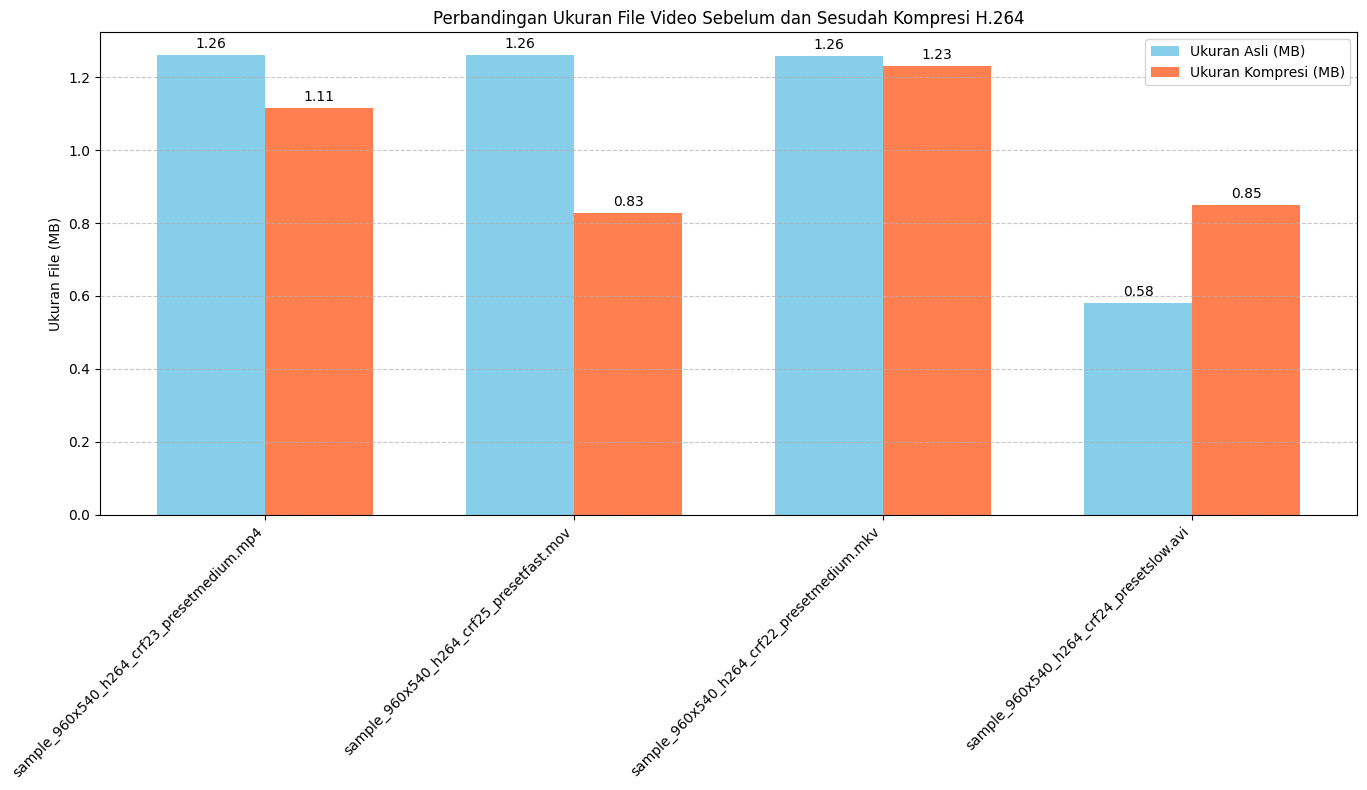

In [6]:
if statistik_kompresi:
    nama_files_label = [f"{stats['nama_file_kompresi']}" for stats in statistik_kompresi]
    ukuran_asli_mb = [stats["ukuran_asli_mb"] for stats in statistik_kompresi]
    ukuran_kompresi_mb = [stats["ukuran_kompresi_mb"] for stats in statistik_kompresi]

    x = np.arange(len(nama_files_label))
    width = 0.35

    fig, ax = plt.subplots(figsize=(14, 8))
    rects1 = ax.bar(x - width/2, ukuran_asli_mb, width, label='Ukuran Asli (MB)', color='skyblue')
    rects2 = ax.bar(x + width/2, ukuran_kompresi_mb, width, label='Ukuran Kompresi (MB)', color='coral')

    ax.set_ylabel('Ukuran File (MB)')
    ax.set_title('Perbandingan Ukuran File Video Sebelum dan Sesudah Kompresi H.264')
    ax.set_xticks(x)
    ax.set_xticklabels(nama_files_label, rotation=45, ha="right")
    ax.legend()

    ax.bar_label(rects1, padding=3, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fmt='%.2f')

    fig.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Tidak ada data statistik untuk divisualisasikan (ukuran file). Pastikan video input ada dan berhasil dikompresi.")

Grafik perbandingan ini menunjukkan bahwa kompresi H.264 memberikan hasil yang beragam pada file video dengan format container dan setting kompresi yang berbeda. File MP4 dan MOV berhasil dikurangi ukurannya, dengan MOV menunjukkan efisiensi kompresi terbaik. Sebaliknya, file MKV hampir tidak mengalami perubahan ukuran, sementara file AVI justru mengalami peningkatan ukuran setelah proses kompresi, yang mengindikasikan bahwa file AVI asli kemungkinan sudah sangat terkompresi atau setting H.264 yang digunakan tidak optimal untuk kasus tersebut.

## Visualisasi Perbandingan Rasio Kompresi

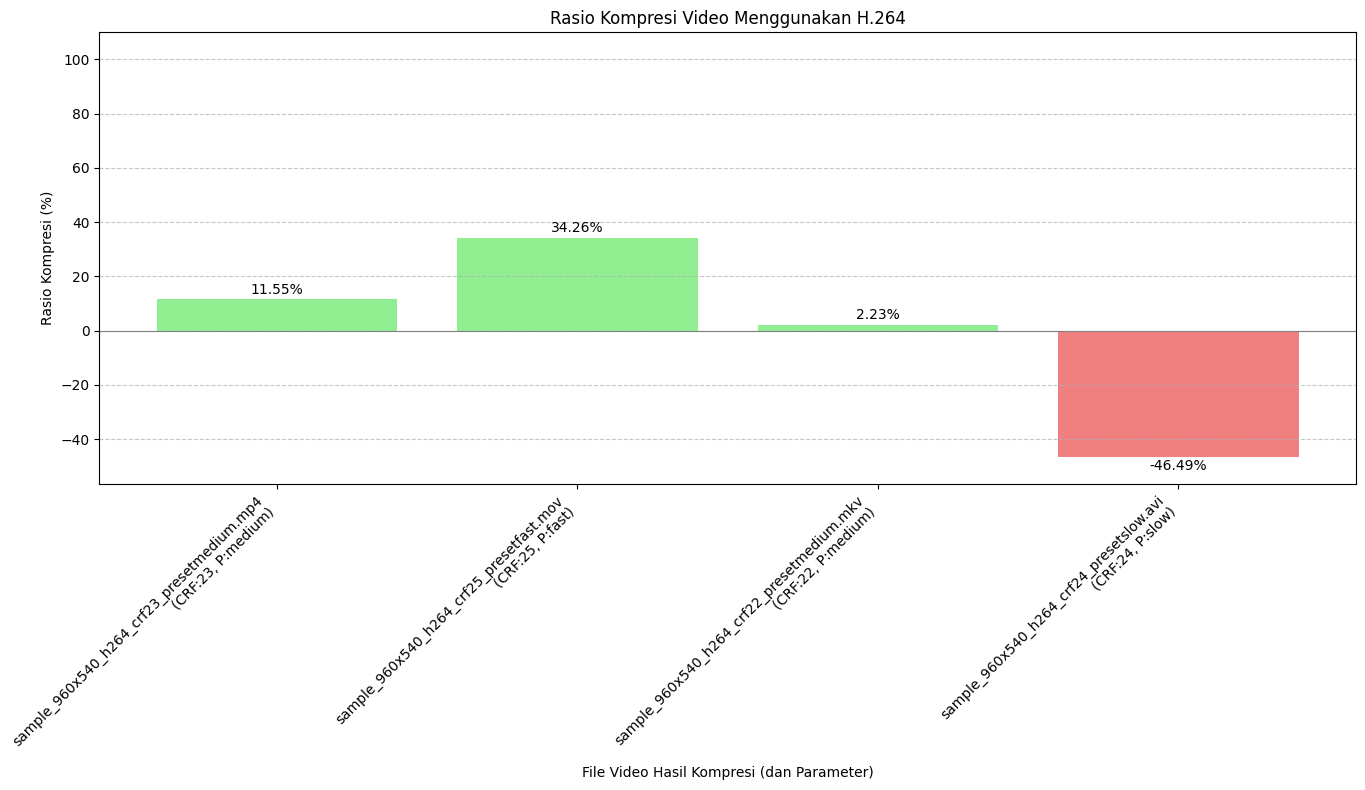

In [7]:
if statistik_kompresi:
    nama_files_label = [f"{stats['nama_file_kompresi']}\n(CRF:{stats['crf']}, P:{stats['preset']})" for stats in statistik_kompresi]
    rasio_kompresi_persen = [stats["rasio_kompresi_persen"] for stats in statistik_kompresi]

    plt.figure(figsize=(14, 8)) 
    bars = plt.bar(nama_files_label, rasio_kompresi_persen, color=['lightcoral' if r < 0 else 'lightgreen' for r in rasio_kompresi_persen])
    
    plt.xlabel('File Video Hasil Kompresi (dan Parameter)')
    plt.ylabel('Rasio Kompresi (%)')
    plt.title('Rasio Kompresi Video Menggunakan H.264')
    plt.xticks(rotation=45, ha="right")
    
    min_rasio = 0
    max_rasio = 100
    if rasio_kompresi_persen: 
        min_rasio = min(rasio_kompresi_persen)
        max_rasio = max(rasio_kompresi_persen)

    padding = 10 
    plt.ylim(min(0, min_rasio) - padding, max(100, max_rasio) + padding)
    
    plt.axhline(0, color='grey', linewidth=0.8)

    for bar in bars:
        yval = bar.get_height()
        if yval >= 0:
            plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
        else:
            plt.text(bar.get_x() + bar.get_width()/2.0, yval - 1, f'{yval:.2f}%', ha='center', va='top')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada data statistik untuk divisualisasikan (rasio kompresi). Pastikan video input ada dan berhasil dikompresi.")

Grafik ini secara efektif menggambarkan efisiensi kompresi H.264 pada berbagai file video dengan parameter yang berbeda, di mana bar hijau menunjukkan keberhasilan pengurangan ukuran file dan bar merah (negatif) menandakan peningkatan ukuran. Terlihat bahwa file MOV (sample_960x540_h264_crf25_presetfast.mov) mencapai rasio kompresi positif tertinggi (34.26%), sedangkan file AVI (sample_960x540_h264_crf24_presetfast.avi) justru membengkak ukurannya hingga 52.34% setelah proses "kompresi". Sementara itu, file MP4 menunjukkan kompresi sedang (11.55%) dan file MKV hanya sedikit sekali terkompresi (2.23%), menggambarkan bagaimana setting dan format input sangat mempengaruhi hasil akhir.